# Requirments :

<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)

In [168]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
353,1,90,62,12,43,27.2,0.580,24,0
454,2,100,54,28,105,37.8,0.498,24,0
571,2,130,96,0,0,22.6,0.268,21,0


# Libraries 

In [167]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
sns.set_palette('Set2')
# ML 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
# Additional Imports here


# 1-Split Data

In [169]:
# select split parameter
X = df.drop(['Outcome'], axis=1)
y = df.Outcome


In [170]:
# splitting into train and test sets for both parameters
X_train, X_test ,y_train , y_test = train_test_split(X,y, test_size=0.7, random_state= 42)


# 2- EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data).


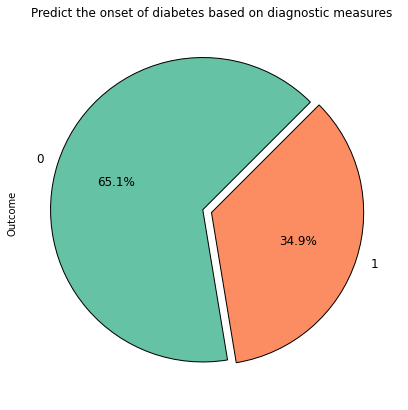

In [171]:
# View Target Distribution
plt.figure(figsize=(7,7))
df.Outcome.value_counts().plot.pie(explode= (0.06 , 0.0), autopct='%1.1f%%', startangle=45 , textprops={'fontsize': 12} , 
wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True}).set(title = 'Predict the onset of diabetes based on diagnostic measures');


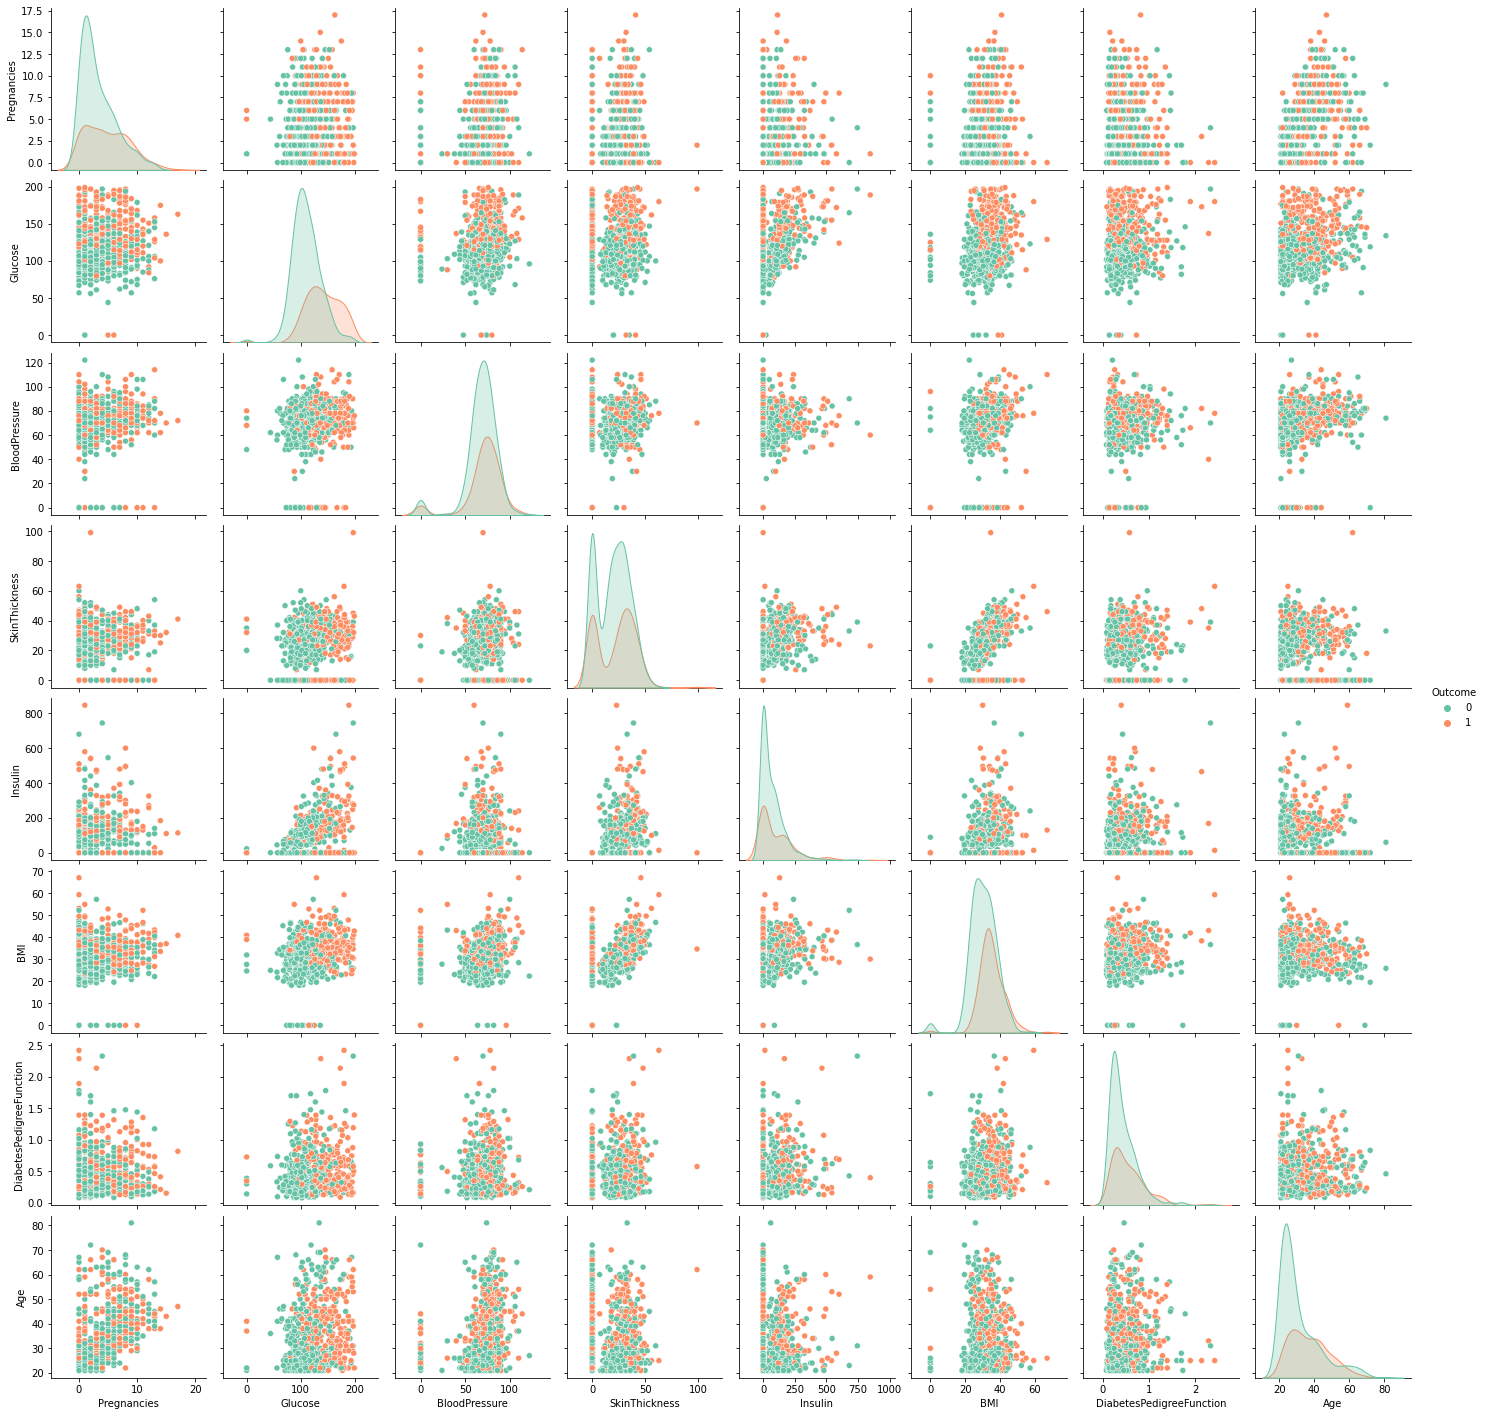

In [172]:
sns.pairplot(data=df , hue='Outcome')

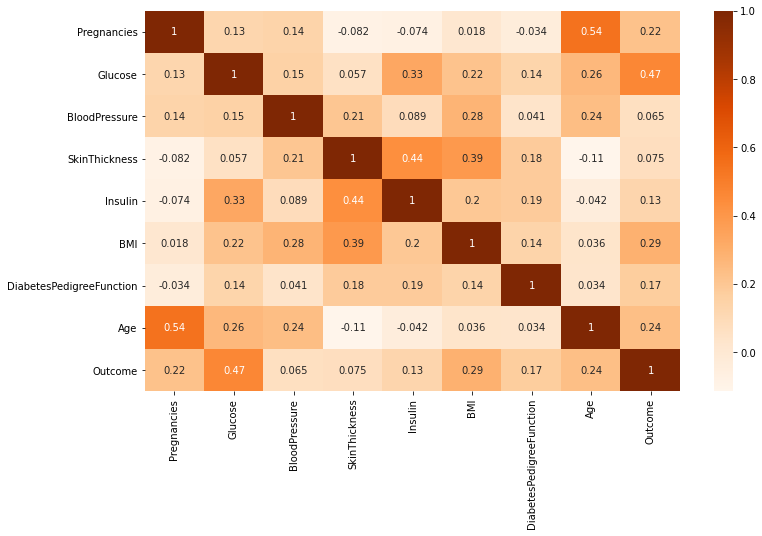

In [173]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True , cmap='Oranges')


# 3- Determine Baseline Model

In [174]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [175]:
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    # list to save all the predicted values in
    baseline_preds = []
    for i in range(n_predictions): # loop through your training set size
        baseline_preds.append(value_to_predict) # predict the most common values for each row and store it in the list
    return pd.Series(baseline_preds) # return the predictions list as series

n_predictions = len(y_test)  # how many predictions to make?
baseline_value = y_train.value_counts().index[0]  # what value to predict? (classification = most common class (0 mean's " not  Diabetes"))

baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds # print all predicted values


0      0
1      0
2      0
3      0
4      0
      ..
533    0
534    0
535    0
536    0
537    0
Length: 538, dtype: int64

In [176]:
acc_base = accuracy_score(y_test , baseline_preds)
acc_base


0.6486988847583643

# 4- Scale Data

In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #  initiate the scaller

X_train= scaler.fit_transform(X_train) # transform the Entry values 
X_test= scaler.transform(X_test)



In [178]:
X_train = pd.DataFrame(X_train) # make df from X_train
X_train

,0,1,2,3,4,5,6,7
0,-0.566204,2.453720,0.014868,1.551004,4.176534,-0.191493,-0.970404,1.729714
1,0.032540,-0.988061,1.114069,1.679881,-0.197771,0.842121,-0.335891,-0.328937
2,2.128147,0.555915,0.381269,-1.348724,-0.680824,0.196112,-0.155491,0.185726
3,-1.164949,-0.955895,-0.107265,0.713305,1.197713,1.157948,-0.276795,-0.672045
4,-1.164949,-1.116726,-0.107265,0.713305,-0.680824,0.569362,-0.721575,-0.672045
...,...,...,...,...,...,...,...,...
225,0.331913,0.588082,-0.351532,0.906620,0.571534,-0.464253,-0.183484,-0.586268
226,-0.865577,-0.795064,3.190337,-1.348724,-0.680824,-1.354310,-0.817996,-0.500491
227,1.828775,-0.634233,0.991936,1.035497,-0.680824,1.976226,2.071523,0.443057
228,-1.164949,0.652414,-4.259801,-1.348724,-0.680824,1.516842,-0.824217,-0.328937


# 5-Create Logistic Regression Model

In [179]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [180]:
preds = lr.predict(X_test)

pd.Series(preds).value_counts()

0    382
1    156
dtype: int64

In [181]:
acc_LogisScal=accuracy_score(y_test, preds)
acc_LogisScal

0.7713754646840149

# 6- Compare Results to Baseline

In [182]:
accuracies = pd.DataFrame()
accuracies['names'] = ['Baseline','Logistic with Scale' ]
accuracies['values'] = [acc_base  , acc_LogisScal ]

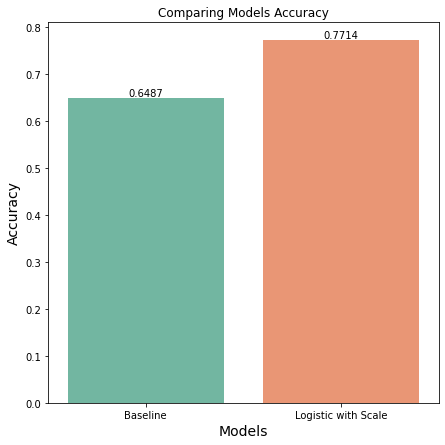

In [183]:
plt.figure(figsize=(7, 7))
splot=sns.barplot(x="names",y="values",data=accuracies)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.title('Comparing Models Accuracy');

# 7- Perform PCA

In [184]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [185]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7
0,-0.566204,2.453720,0.014868,1.551004,4.176534,-0.191493,-0.970404,1.729714
1,0.032540,-0.988061,1.114069,1.679881,-0.197771,0.842121,-0.335891,-0.328937
2,2.128147,0.555915,0.381269,-1.348724,-0.680824,0.196112,-0.155491,0.185726
3,-1.164949,-0.955895,-0.107265,0.713305,1.197713,1.157948,-0.276795,-0.672045
4,-1.164949,-1.116726,-0.107265,0.713305,-0.680824,0.569362,-0.721575,-0.672045
...,...,...,...,...,...,...,...,...
225,0.331913,0.588082,-0.351532,0.906620,0.571534,-0.464253,-0.183484,-0.586268
226,-0.865577,-0.795064,3.190337,-1.348724,-0.680824,-1.354310,-0.817996,-0.500491
227,1.828775,-0.634233,0.991936,1.035497,-0.680824,1.976226,2.071523,0.443057
228,-1.164949,0.652414,-4.259801,-1.348724,-0.680824,1.516842,-0.824217,-0.328937


In [186]:
pca.explained_variance_ratio_

array([0.24863425, 0.19898731, 0.1477866 , 0.11130279, 0.10288763,
       0.09623593, 0.04878914, 0.04537636])

In [187]:
np.sum(pca.explained_variance_ratio_)

0.9999999999999998

In [188]:
pca.singular_values_

array([21.38894604, 19.13469752, 16.49021944, 14.31073464, 13.7591148 ,
       13.30691999,  9.47480929,  9.13742329])

In [189]:
pd.DataFrame(pca.fit_transform(X_train))

,0,1,2,3,4,5,6,7
0,3.247109,1.660168,3.281428,-2.096310,-0.569905,0.417364,0.888817,0.640101
1,0.560754,0.568795,-1.968075,-1.096535,-0.510018,0.025194,-0.076394,0.171787
2,0.519014,-2.045024,0.023690,0.435763,0.844865,-0.181280,-0.422429,-1.340175
3,-0.176719,1.821116,-0.634316,-0.898331,0.074841,-0.011859,1.237728,0.002794
4,-1.162067,0.780106,-1.280685,-0.804600,0.170312,0.077844,0.214129,0.746380
...,...,...,...,...,...,...,...,...
225,0.289836,0.648744,0.558302,-0.663572,-0.290144,-0.458640,-0.830379,-0.283079
226,-1.029678,-1.227784,-0.931174,-0.261256,-1.296593,3.318966,0.008065,-0.629410
227,2.148988,-0.185794,-2.553756,1.334891,0.072983,-1.140723,-0.008059,-0.629637
228,-2.179541,0.750024,1.569406,0.341779,3.391730,-2.015670,0.718299,1.150687


In [190]:
pd.DataFrame(pca.fit_transform(X_train))[0].value_counts()

-1.627688    1
 0.506260    1
 1.159231    1
-0.359658    1
-0.404051    1
            ..
 1.916263    1
 2.648645    1
 0.643882    1
 0.519014    1
 0.355375    1
Name: 0, Length: 230, dtype: int64

# 8-1 Logistic Regression Model with PCA

In [191]:
lr2 = LogisticRegression()

X_train = pca.fit_transform(X_train)

lr2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [192]:
X_test = pca.fit_transform(X_test)

preds = lr2.predict(X_test)

In [193]:
acc_LogisPCA=accuracy_score(y_test, preds)
acc_LogisPCA

0.6877323420074349

#8-2 Logistic Regression Model without PCA

In [194]:
lr3 = LogisticRegression()


lr3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
X_test = pca.fit_transform(X_test)

preds = lr3.predict(X_test)

In [196]:
acc_Logis=accuracy_score(y_test, preds)
acc_Logis

0.6877323420074349

# 9-Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA





In [197]:
# Save each Accuracy with its model name in a data frame
accuracies = pd.DataFrame()
accuracies['names'] = ['Baseline','Logistic with Scale' ,'Logistic only', 'Logistic with PCA' ]
accuracies['values'] = [acc_base  , acc_LogisScal ,acc_Logis, acc_LogisPCA]

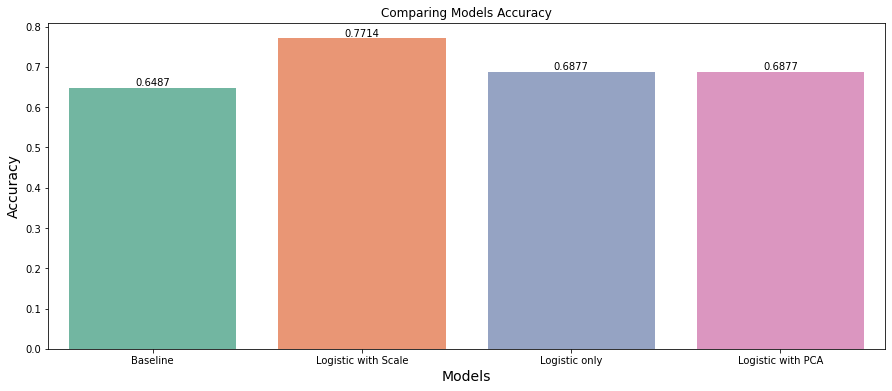

In [198]:
plt.figure(figsize=(15, 6))
splot=sns.barplot(x="names",y="values",data=accuracies)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.title('Comparing Models Accuracy');

**as we see in the plot  when we compare Results of  Baseline and Logistic Regression Model without PCA we have hiegher accuracy score and we concload that Logistic Regression Model have accuracy higherest score**

# BONUS✨

Create a Scree Plot (You will probably have to research this)

Text(0, 0.5, 'Proportion of Variance Explained')

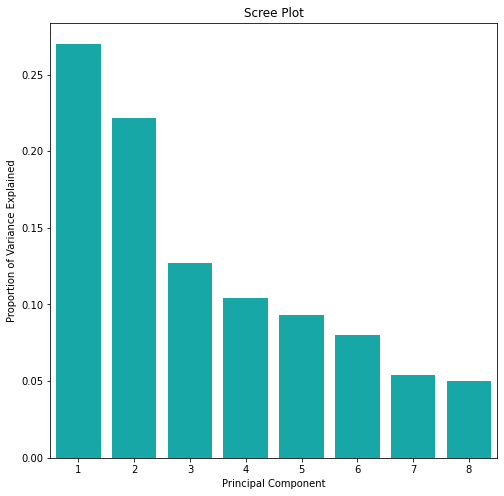

In [212]:
from sklearn.decomposition import PCA


columns=np.arange(pca.n_components_) + 1
            
df_var_explained = pd.DataFrame(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 8))

sns.barplot(x=columns,y=pca.explained_variance_ratio_, data=df_var_explained, color="c");
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')